In [2]:

import pandas as pd



# Specify the filename directly (replace 'your_file.xlsx' with the actual filename)
df = pd.read_excel('vitdlevel.xlsx')  # Replace 'vitdlevel.xlsx' with your file's name

# Inspect dataset
print("Dataset Shape:", df.shape)


Dataset Shape: (907, 53)


In [3]:

print("Missing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)


Missing Values:
 Gender                 0
Age                    0
Glucose              127
HbA1c                363
HbA1c_IFCC           531
Creatinin            339
Urea                 595
Uric_Acid            616
ALT                  290
AST                  330
ALP                  621
GGT                  629
Sodium               592
Potassium            558
Total_Cholesterol    615
HDL                  375
LDL                  337
Triglyceride         306
Iron                 166
Iron_Binding         632
Calcium              613
Magnesium            567
CK                   652
CRP                  494
WBC                  348
RBC                  348
HGB                  348
HCT                  348
MCV                  348
MCH                  348
MCHC                 348
RDW-CV               348
PLT                  348
MPV                  348
PCT                  348
PDW                  348
LY#                  348
MO#                  348
NE#                  348
EO#     

In [4]:
# Code: Fix Data Types and Impute Missing Values
from sklearn.impute import SimpleImputer

# Convert Age to numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Impute missing numerical values with mean
num_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# Verify missing values are handled
print("Missing Values After Imputation:\n", df.isnull().sum().sum())


Missing Values After Imputation:
 0


In [5]:
# Code: Feature Scaling
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Confirm scaling
print(df[numerical_cols].head())


     Gender       Age   Glucose         HbA1c    HbA1c_IFCC  Creatinin  \
0  0.884265  1.003343  0.387332  1.404858e-01 -8.308218e-16  -0.739738   
1  0.884265  1.474941 -0.185134 -1.495861e-01 -8.308218e-16   0.360507   
2  0.884265  1.108142  0.000000 -2.862618e-16 -8.308218e-16   0.000000   
3  0.884265  0.636543 -0.814846 -1.495861e-01 -8.308218e-16  -0.923112   
4  0.884265  0.269744 -0.471366 -4.074278e-01 -8.308218e-16   0.421631   

           Urea     Uric_Acid       ALT           AST  ...       EO%  \
0  6.337945e-16  4.279538e-01 -0.155223 -8.561148e-01  ... -0.664897   
1  6.337945e-16 -2.991703e+00 -0.241582 -3.350324e-02  ...  1.407033   
2  6.337945e-16  1.092542e-15  0.000000  4.870839e-16  ...  1.340196   
3  6.337945e-16 -5.807220e-01 -0.327941  4.870839e-16  ...  4.214164   
4  6.337945e-16 -1.269574e+00  0.017496 -1.130319e+00  ...  0.137140   

        BA%       LY%  Sedimentation        T3        T4       TSH  Ferritin  \
0 -0.588141  0.680341      -0.425647  0.00

<ipython-input-6-83e4299e37fc>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='VitDLevel', data=df, palette='viridis')


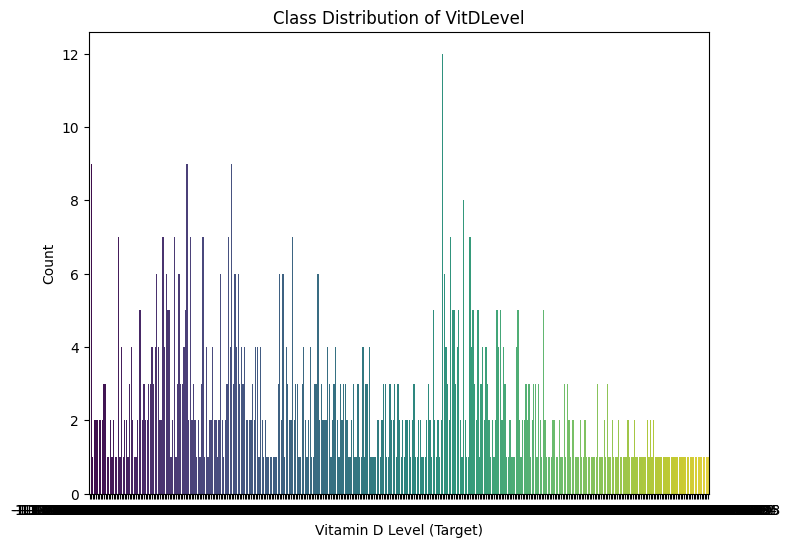

In [6]:
# Code: Plot Class Distribution
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of VitDLevel (Target Variable)
plt.figure(figsize=(8, 6))
sns.countplot(x='VitDLevel', data=df, palette='viridis')
plt.title("Class Distribution of VitDLevel")
plt.xlabel("Vitamin D Level (Target)")
plt.ylabel("Count")
plt.show()


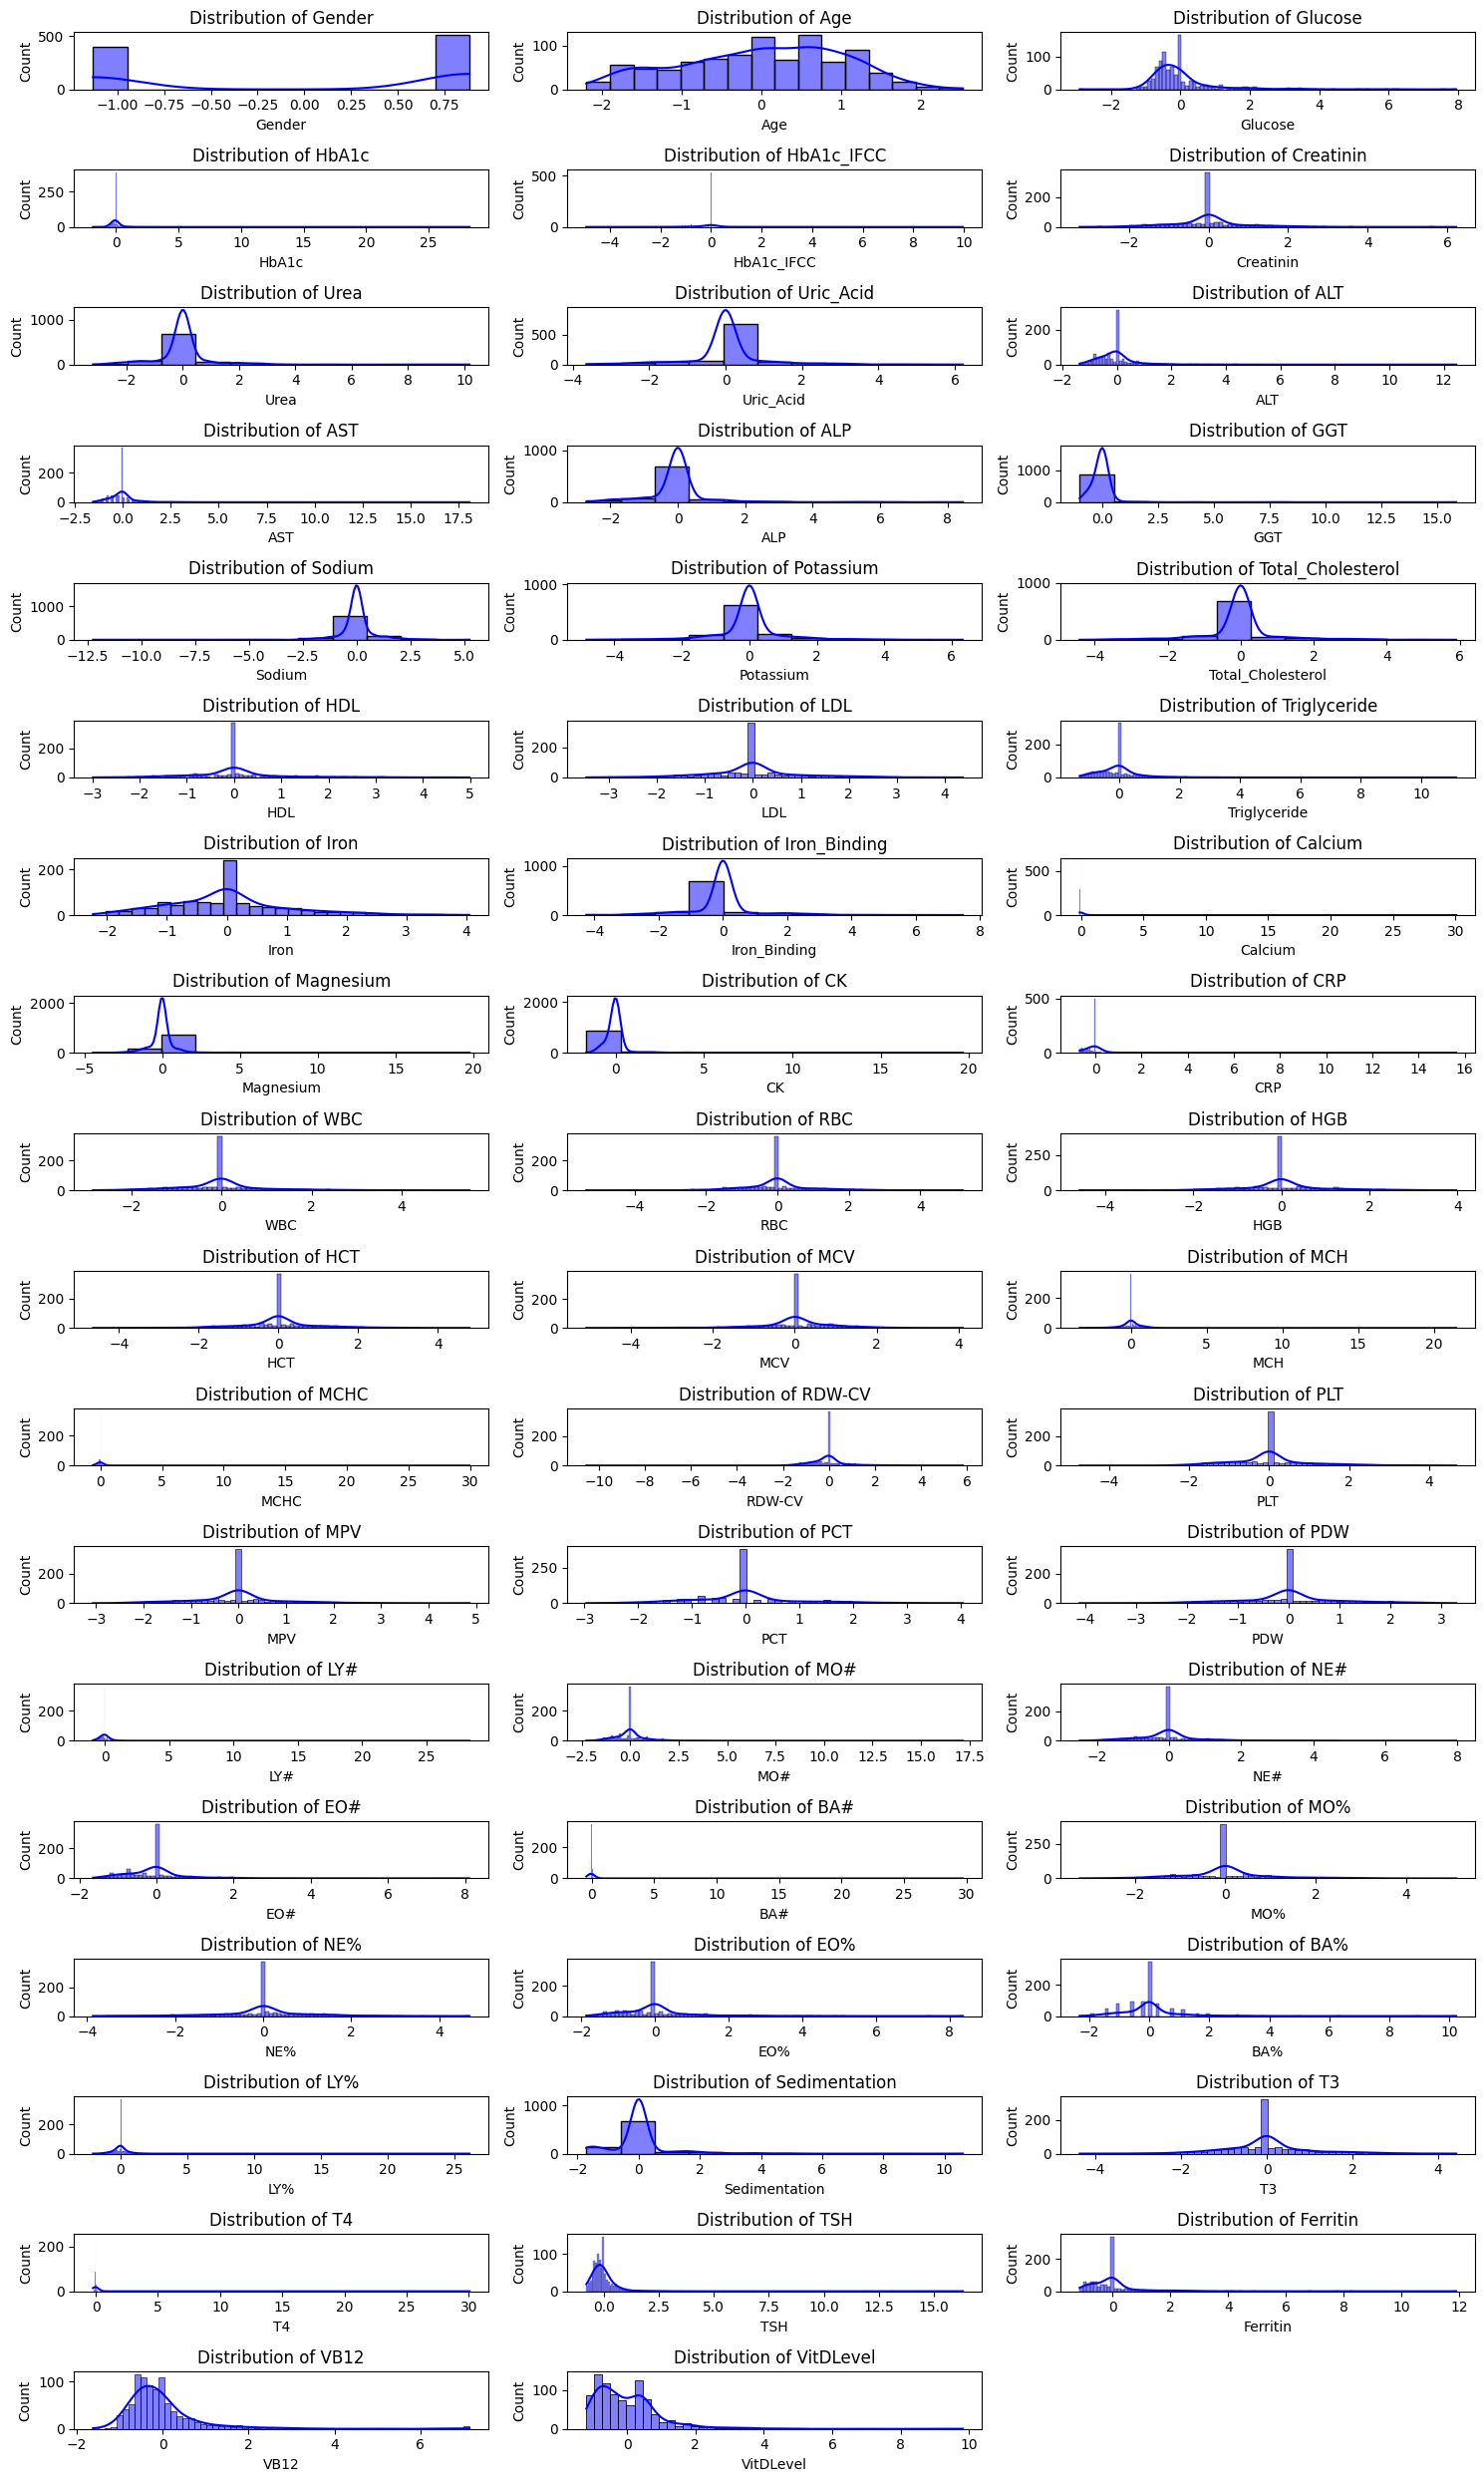

In [7]:
# Code: Feature Distributions
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 25))
for i, column in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns) // 3 + 1, 3, i + 1)
    sns.histplot(df[column], kde=True, color='blue')
    plt.title(f"Distribution of {column}")
    plt.tight_layout()
plt.show()


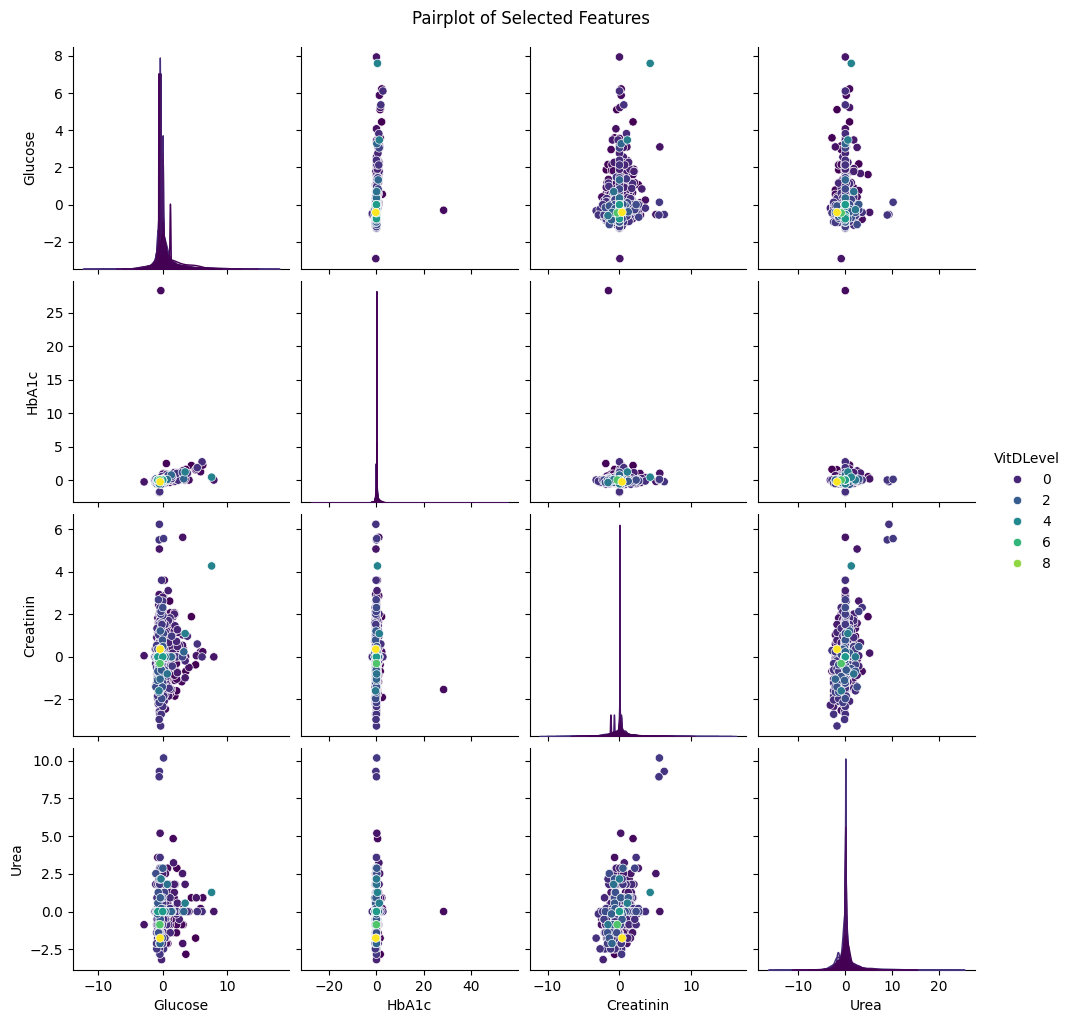

In [9]:
# Code: Pairplot for Selected Features
selected_columns = ['Glucose', 'HbA1c', 'Creatinin', 'Urea', 'VitDLevel']  # Customize as needed
sns.pairplot(df[selected_columns], hue='VitDLevel', palette='viridis', diag_kind='kde')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


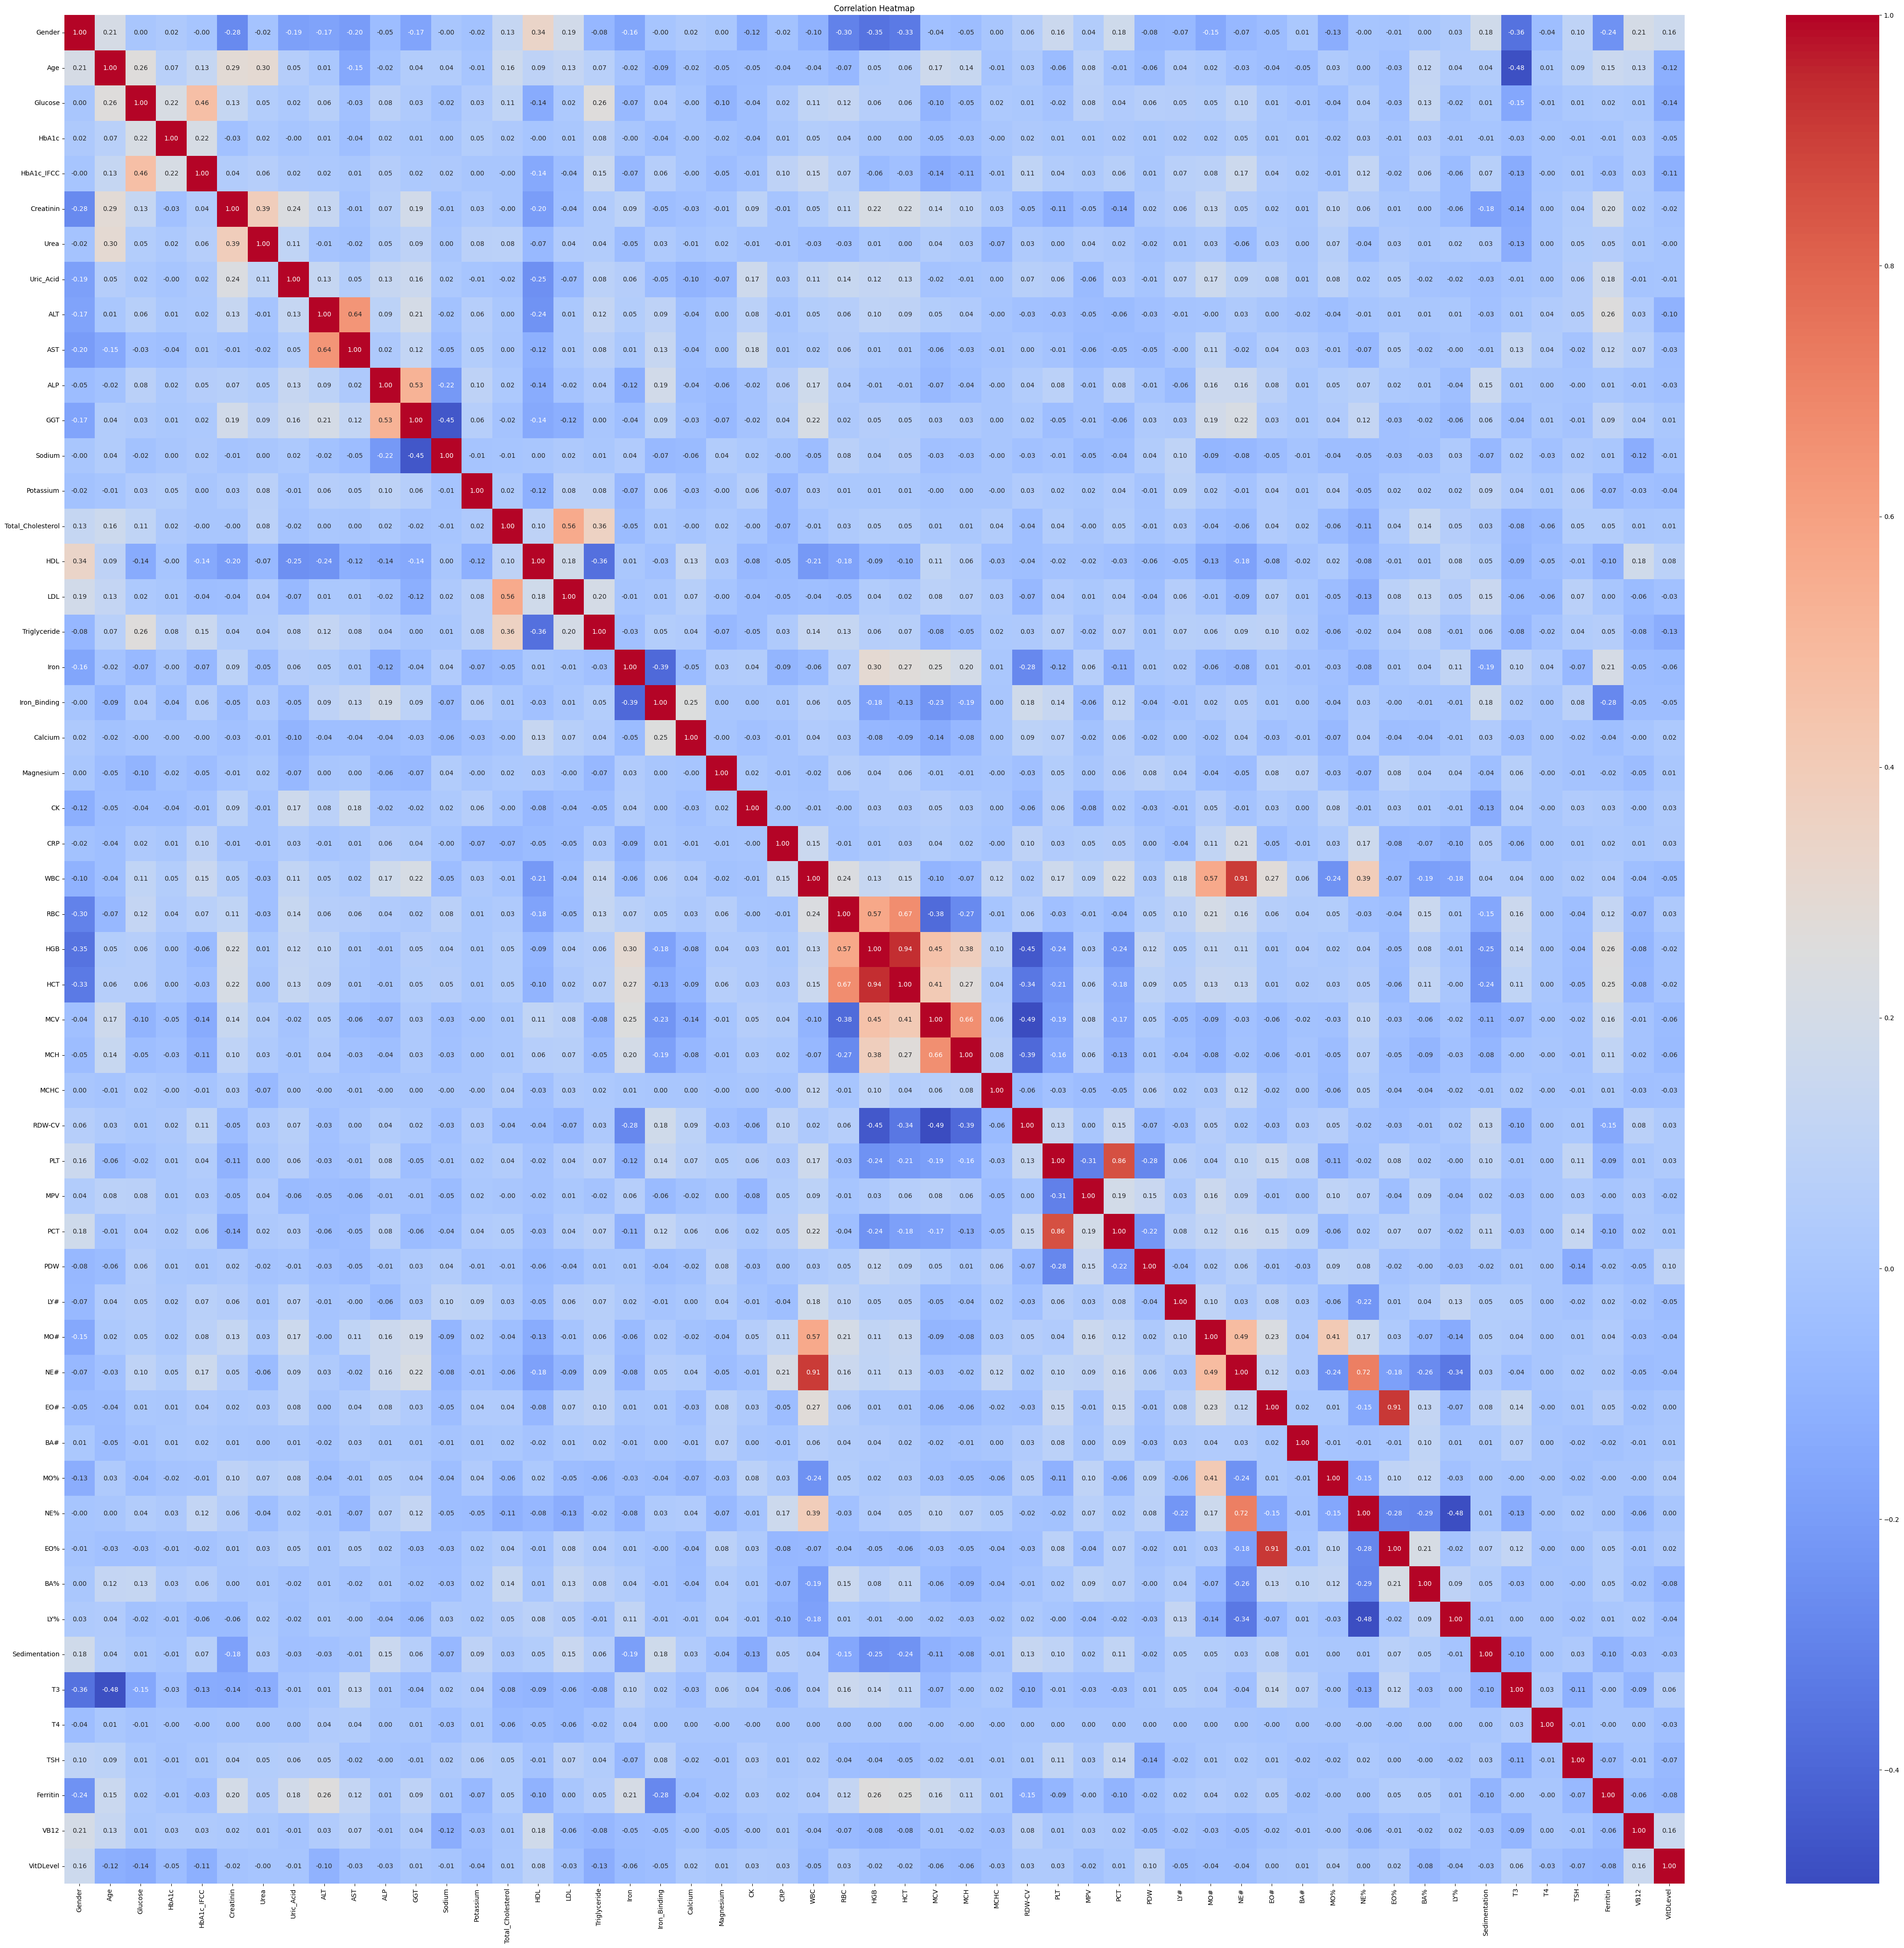

In [11]:
# Code: Correlation Heatmap
plt.figure(figsize=(56, 52))
correlation_matrix = df.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap")
plt.show()


In [13]:
# Check class distribution
print("Class Distribution:\n", y.value_counts())


Class Distribution:
 VitDLevel
 0.289585    12
-0.612413     9
-0.794023     9
-1.181458     9
 0.362230     8
             ..
-0.987741     1
 1.887756     1
 1.918025     1
 1.978562     1
 2.039098     1
Name: count, Length: 388, dtype: int64


In [18]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df' is your original dataframe
# Discretize the continuous target into categories (bins)
bins = 5  # You can adjust the number of bins based on your data
y_binned = pd.cut(df['VitDLevel'], bins=bins, labels=False)  # Convert continuous target to discrete categories

# Split dataset into features and binned target
X = df.drop(columns=['VitDLevel'])  # Features
y = y_binned  # Binned Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Random Forest Classifier on the resampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)

# Evaluate performance
y_pred = model.predict(X_test)
print("Classification Report With SMOTE (Binned Target):\n", classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='viridis')
plt.title("Confusion Matrix With SMOTE (Binned Target)")
plt.show()


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 53 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             907 non-null    float64
 1   Age                907 non-null    float64
 2   Glucose            907 non-null    float64
 3   HbA1c              907 non-null    float64
 4   HbA1c_IFCC         907 non-null    float64
 5   Creatinin          907 non-null    float64
 6   Urea               907 non-null    float64
 7   Uric_Acid          907 non-null    float64
 8   ALT                907 non-null    float64
 9   AST                907 non-null    float64
 10  ALP                907 non-null    float64
 11  GGT                907 non-null    float64
 12  Sodium             907 non-null    float64
 13  Potassium          907 non-null    float64
 14  Total_Cholesterol  907 non-null    float64
 15  HDL                907 non-null    float64
 16  LDL  

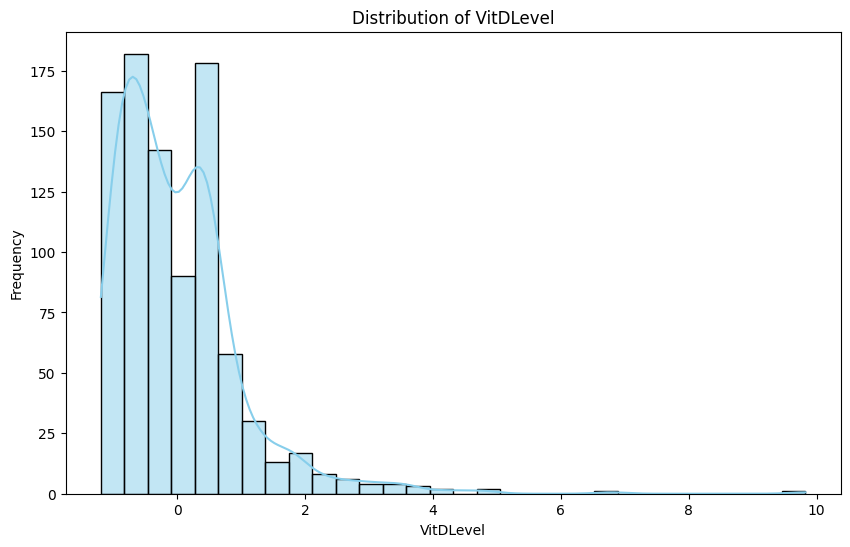


Missing Values in Each Column:
Gender               0
Age                  0
Glucose              0
HbA1c                0
HbA1c_IFCC           0
Creatinin            0
Urea                 0
Uric_Acid            0
ALT                  0
AST                  0
ALP                  0
GGT                  0
Sodium               0
Potassium            0
Total_Cholesterol    0
HDL                  0
LDL                  0
Triglyceride         0
Iron                 0
Iron_Binding         0
Calcium              0
Magnesium            0
CK                   0
CRP                  0
WBC                  0
RBC                  0
HGB                  0
HCT                  0
MCV                  0
MCH                  0
MCHC                 0
RDW-CV               0
PLT                  0
MPV                  0
PCT                  0
PDW                  0
LY#                  0
MO#                  0
NE#                  0
EO#                  0
BA#                  0
MO%                  0
NE

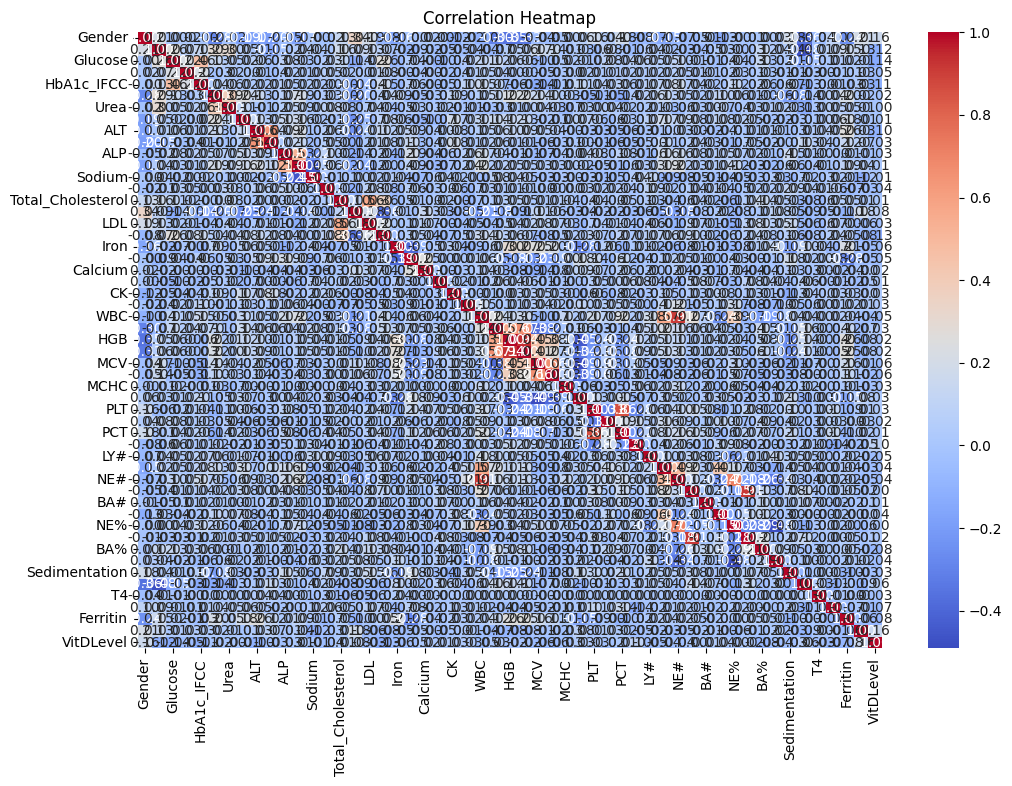

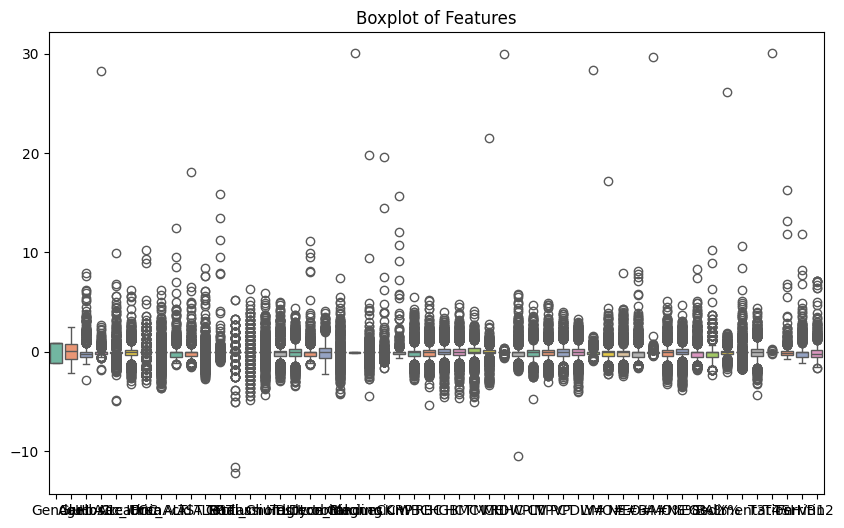

In [19]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your original dataframe
# Basic information about the data
print("Dataset Information:")
df.info()

print("\nSummary Statistics for Numeric Features:")
print(df.describe())

# Target Variable Analysis
print("\nTarget Variable Distribution (VitDLevel):")
print(df['VitDLevel'].describe())

# Plot the distribution of the target variable (VitDLevel)
plt.figure(figsize=(10, 6))
sns.histplot(df['VitDLevel'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of VitDLevel')
plt.xlabel('VitDLevel')
plt.ylabel('Frequency')
plt.show()

# Check for any missing values in the data
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)

# Correlation heatmap of features (if there are multiple features)
if len(df.columns) > 1:  # If there are other features apart from VitDLevel
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

# Check for outliers in the features (boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.drop(columns=['VitDLevel']), palette='Set2')
plt.title('Boxplot of Features')
plt.show()


In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error

# Load your dataset
# Assuming df is the dataframe that holds the data

# Separate features and target
X = df.drop('VitDLevel', axis=1)
y = df['VitDLevel']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape the data for RNN input: [samples, timesteps, features]
# Here we assume timesteps=1, meaning no sequential dependencies
X_scaled = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the RNN model
model = Sequential()
model.add(SimpleRNN(units=64, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Optionally, you can print predictions vs actual values for a better evaluation
for i in range(10):
    print(f"Actual: {y_test.iloc[i]}, Predicted: {y_pred[i]}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 3.2510 - val_loss: 1.3300
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.6265 - val_loss: 1.0730
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0434 - val_loss: 0.9932
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0778 - val_loss: 0.9450
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9043 - val_loss: 0.9127
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0017 - val_loss: 0.8976
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8511 - val_loss: 0.8957
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7916 - val_loss: 0.8768
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0641 - val_loss: 0.8747
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6029 - val_loss: 0.8376
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6760 - val_loss: 0.8651
Epoch 12/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6765 - val_l

In [21]:
# Step 1: Install and Import Necessary Libraries
!pip install xgboost

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

# Step 2: Load and Prepare Data
# Assuming 'df' is your DataFrame and 'VitDLevel' is the target variable
X = df.drop('VitDLevel', axis=1)  # Features
y = df['VitDLevel']  # Target variable

# Scaling the features (important for models like XGBoost)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 3: Train the XGBoost Model
model = xgb.XGBRegressor(
    objective='reg:squarederror',  # For regression
    colsample_bytree=0.3,
    learning_rate=0.1,
    max_depth=5,
    alpha=10,
    n_estimators=1000
)

model.fit(X_train, y_train)

# Step 4: Make Predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Displaying actual vs predicted values for a sample
for actual, predicted in zip(y_test[:10], y_pred[:10]):
    print(f"Actual: {actual}, Predicted: {predicted}")


Mean Squared Error: 0.9376990927507425
Actual: 1.8756490049102275, Predicted: 0.4046498239040375
Actual: -0.2370845865099953, Predicted: -0.1830386221408844
Actual: -0.4913390588299075, Predicted: -0.06306414306163788
Actual: 0.5862156095735297, Predicted: 0.4819270670413971
Actual: 0.7496649132077592, Predicted: 0.5169057250022888
Actual: 1.27633489158472, Predicted: -0.09461937099695206
Actual: 0.023223563722295778, Predicted: -0.35773468017578125
Actual: -0.6245199729022425, Predicted: 0.2261802852153778
Actual: 4.285012814037015, Predicted: 0.3896681070327759
Actual: 0.09586769867084208, Predicted: 0.07166269421577454


In [24]:
!pip install --upgrade scikit-learn xgboost


In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Load your data (replace with your dataset)
# data = pd.read_csv('your_data.csv')
# X = data.drop(columns=['target_column'])  # Replace with your features
# y = data['target_column']  # Replace with your target

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print Actual vs Predicted values
for actual, pred in zip(y_test, y_pred):
    print(f"Actual: {actual}, Predicted: {pred}")




Mean Squared Error: 1.0560309919162183
Actual: 1.8756490049102275, Predicted: -0.13294322471544495
Actual: -0.2370845865099953, Predicted: -0.10162288712472238
Actual: -0.4913390588299075, Predicted: 0.23639767157956726
Actual: 0.5862156095735297, Predicted: 0.1611420786659255
Actual: 0.7496649132077592, Predicted: 0.3280191610405019
Actual: 1.27633489158472, Predicted: 0.26689584031438607
Actual: 0.023223563722295778, Predicted: -0.17911775008569691
Actual: -0.6245199729022425, Predicted: -0.11490085460391677
Actual: 4.285012814037015, Predicted: 0.16501299663364388
Actual: 0.09586769867084208, Predicted: -0.13993548865099661
Actual: 0.0837603428460844, Predicted: -0.1226273989870046
Actual: 6.785181791849485, Predicted: 0.29202495894635294
Actual: -1.0059016813821107, Predicted: -0.14387529435888788
Actual: -0.8727207673097758, Predicted: -0.2324653980847009
Actual: -0.5760905496032116, Predicted: -0.204568492039395
Actual: 0.3198537814288599, Predicted: -0.2371728288105562
Actual: -

In [31]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# Set the parameters for the LightGBM model
params = {
    'objective': 'regression',  # Regression task
    'metric': 'mean_squared_error',  # Metric for regression
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'num_leaves': 31,  # Number of leaves in full trees
    'learning_rate': 0.05,  # Learning rate
    'feature_fraction': 0.9  # Fraction of features to use at each iteration
}

# Create the LightGBM dataset for training
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Train the model with early stopping using the fit() function
lgb_model = lgb.train(params, train_data, valid_sets=[test_data])

# Make predictions
y_pred = lgb_model.predict(X_test, num_iteration=lgb_model.best_iteration)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print Actual vs Predicted values
for actual, pred in zip(y_test, y_pred):
    print(f"Actual: {actual}, Predicted: {pred}")



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4012
[LightGBM] [Info] Number of data points in the train set: 725, number of used features: 52
[LightGBM] [Info] Start training from score -0.001470
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

In [32]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00


In [33]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

# Initialize the CatBoost Regressor
catboost_model = CatBoostRegressor(
    iterations=1000,       # Number of trees
    learning_rate=0.05,    # Learning rate
    depth=6,               # Depth of each tree
    loss_function='RMSE',  # Root Mean Squared Error for regression
    cat_features=[],       # If you have categorical features, add them here
    verbose=100            # Print progress every 100 iterations
)

# Train the model
catboost_model.fit(X_train, y_train, eval_set=(X_test, y_test))

# Make predictions
y_pred = catboost_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print Actual vs Predicted values
for actual, pred in zip(y_test, y_pred):
    print(f"Actual: {actual}, Predicted: {pred}")


0:	learn: 0.9702482	test: 1.0901067	best: 1.0901067 (0)	total: 53.2ms	remaining: 53.1s
100:	learn: 0.7244679	test: 0.9794570	best: 0.9792385 (95)	total: 554ms	remaining: 4.93s
200:	learn: 0.5919414	test: 0.9699732	best: 0.9690403 (197)	total: 1.09s	remaining: 4.33s
300:	learn: 0.4930320	test: 0.9700191	best: 0.9686072 (254)	total: 1.76s	remaining: 4.1s
400:	learn: 0.4243543	test: 0.9764401	best: 0.9686072 (254)	total: 2.3s	remaining: 3.43s
500:	learn: 0.3679053	test: 0.9802456	best: 0.9686072 (254)	total: 2.95s	remaining: 2.94s
600:	learn: 0.3267258	test: 0.9829999	best: 0.9686072 (254)	total: 3.48s	remaining: 2.31s
700:	learn: 0.2907523	test: 0.9858344	best: 0.9686072 (254)	total: 4s	remaining: 1.7s
800:	learn: 0.2568517	test: 0.9890067	best: 0.9686072 (254)	total: 4.94s	remaining: 1.23s
900:	learn: 0.2335338	test: 0.9903337	best: 0.9686072 (254)	total: 6.92s	remaining: 761ms
999:	learn: 0.2097217	test: 0.9927044	best: 0.9686072 (254)	total: 8.59s	remaining: 0us

bestTest = 0.96860718

In [35]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=73b65ff35a36ddccc040ce1f18b0d5b3f7e6937d1350af92927643287661731a
  Stored in directory: /root/.cache/pip/wheels/0c/95/eb/b449c73f478dbc4557b80170cf7f2aa6db15862877e9a63536
Successfully built h2o


In [38]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Initialize the GradientBoostingRegressor model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Calculate and print Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print actual vs predicted values for inspection
for actual, predicted in zip(y_test[:10], y_pred[:10]):
    print(f"Actual: {actual}, Predicted: {predicted}")



Mean Squared Error: 1.0312776535049193
Actual: 1.8756490049102275, Predicted: 0.21641336312673465
Actual: -0.2370845865099953, Predicted: 0.6404344074556043
Actual: -0.4913390588299075, Predicted: -0.0010978243735157629
Actual: 0.5862156095735297, Predicted: 0.13712336392708807
Actual: 0.7496649132077592, Predicted: 0.5997344758514481
Actual: 1.27633489158472, Predicted: 0.5829683491106595
Actual: 0.023223563722295778, Predicted: -0.29304088810128476
Actual: -0.6245199729022425, Predicted: 0.12293618847200377
Actual: 4.285012814037015, Predicted: 0.30865677100313604
Actual: 0.09586769867084208, Predicted: 0.13197607936139438


In [39]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

# Initialize the ElasticNet model
elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)

# Train the model
elasticnet_model.fit(X_train, y_train)

# Make predictions
y_pred = elasticnet_model.predict(X_test)

# Calculate and print Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print actual vs predicted values for inspection
for actual, predicted in zip(y_test[:10], y_pred[:10]):
    print(f"Actual: {actual}, Predicted: {predicted}")


Mean Squared Error: 1.196880749269484
Actual: 1.8756490049102275, Predicted: -0.0014704322198687838
Actual: -0.2370845865099953, Predicted: -0.0014704322198687838
Actual: -0.4913390588299075, Predicted: -0.0014704322198687838
Actual: 0.5862156095735297, Predicted: -0.0014704322198687838
Actual: 0.7496649132077592, Predicted: -0.0014704322198687838
Actual: 1.27633489158472, Predicted: -0.0014704322198687838
Actual: 0.023223563722295778, Predicted: -0.0014704322198687838
Actual: -0.6245199729022425, Predicted: -0.0014704322198687838
Actual: 4.285012814037015, Predicted: -0.0014704322198687838
Actual: 0.09586769867084208, Predicted: -0.0014704322198687838


In [40]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Initialize the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Calculate and print Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print actual vs predicted values for inspection
for actual, predicted in zip(y_test[:10], y_pred[:10]):
    print(f"Actual: {actual}, Predicted: {predicted}")


Mean Squared Error: 1.496182411253963
Actual: 1.8756490049102275, Predicted: 1.1637364824144734
Actual: -0.2370845865099953, Predicted: 0.09223549192341474
Actual: -0.4913390588299075, Predicted: 0.8622633223780058
Actual: 0.5862156095735297, Predicted: -0.2697744472368412
Actual: 0.7496649132077592, Predicted: 0.324696723758763
Actual: 1.27633489158472, Predicted: 0.5341539795270716
Actual: 0.023223563722295778, Predicted: 0.1806191894441461
Actual: -0.6245199729022425, Predicted: -0.1535438313191671
Actual: 4.285012814037015, Predicted: 0.09707843425331779
Actual: 0.09586769867084208, Predicted: -0.42474860179374013


In [42]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from sklearn.model_selection import train_test_split

# Example dataset (replace with your own dataset)
# X should be your features and y should be your target variable (VitDLevel)

# Load your dataset
# X, y = your_dataframe[features], your_dataframe[target_column]

# Example split (assuming X and y are already defined)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features (important for RNN models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data to be compatible with RNN input [samples, time steps, features]
# For univariate data, reshape it into a 3D array [samples, 1, features]
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Build the LSTM Model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.2))  # To prevent overfitting
    model.add(Dense(units=1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Build the GRU Model
def build_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(units=50, activation='relu', input_shape=input_shape))
    model.add(Dropout(0.2))  # To prevent overfitting
    model.add(Dense(units=1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the LSTM model
lstm_model = build_lstm_model((X_train_scaled.shape[1], X_train_scaled.shape[2]))
lstm_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=2)

# Train the GRU model
gru_model = build_gru_model((X_train_scaled.shape[1], X_train_scaled.shape[2]))
gru_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=2)

# Make predictions with the models
lstm_preds = lstm_model.predict(X_test_scaled)
gru_preds = gru_model.predict(X_test_scaled)

# Calculate MAE for LSTM and GRU
mae_lstm = mean_absolute_error(y_test, lstm_preds)
mae_gru = mean_absolute_error(y_test, gru_preds)

print(f'MAE for LSTM: {mae_lstm}')
print(f'MAE for GRU: {mae_gru}')



Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 - 7s - 321ms/step - loss: 0.9849
Epoch 2/50
23/23 - 0s - 3ms/step - loss: 0.9076
Epoch 3/50
23/23 - 0s - 5ms/step - loss: 0.8592
Epoch 4/50
23/23 - 0s - 2ms/step - loss: 0.8322
Epoch 5/50
23/23 - 0s - 2ms/step - loss: 0.8075
Epoch 6/50
23/23 - 0s - 2ms/step - loss: 0.7749
Epoch 7/50
23/23 - 0s - 2ms/step - loss: 0.7333
Epoch 8/50
23/23 - 0s - 2ms/step - loss: 0.7270
Epoch 9/50
23/23 - 0s - 3ms/step - loss: 0.7081
Epoch 10/50
23/23 - 0s - 3ms/step - loss: 0.6851
Epoch 11/50
23/23 - 0s - 2ms/step - loss: 0.6864
Epoch 12/50
23/23 - 0s - 2ms/step - loss: 0.6622
Epoch 13/50
23/23 - 0s - 3ms/step - loss: 0.6370
Epoch 14/50
23/23 - 0s - 3ms/step - loss: 0.6095
Epoch 15/50
23/23 - 0s - 2ms/step - loss: 0.6280
Epoch 16/50
23/23 - 0s - 2ms/step - loss: 0.5847
Epoch 17/50
23/23 - 0s - 2ms/step - loss: 0.5865
Epoch 18/50
23/23 - 0s - 2ms/step - loss: 0.5623
Epoch 19/50
23/23 - 0s - 2ms/step - loss: 0.5706
Epoch 20/50
23/23 - 0s - 3ms/step - loss: 0.5569
Epoch 21/50
23/23 - 0s - 3ms/step - lo

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 - 4s - 163ms/step - loss: 1.1154
Epoch 2/50
23/23 - 0s - 8ms/step - loss: 0.9529
Epoch 3/50
23/23 - 0s - 2ms/step - loss: 0.8838
Epoch 4/50
23/23 - 0s - 2ms/step - loss: 0.8473
Epoch 5/50
23/23 - 0s - 3ms/step - loss: 0.8187
Epoch 6/50
23/23 - 0s - 2ms/step - loss: 0.7892
Epoch 7/50
23/23 - 0s - 3ms/step - loss: 0.7431
Epoch 8/50
23/23 - 0s - 2ms/step - loss: 0.7322
Epoch 9/50
23/23 - 0s - 3ms/step - loss: 0.7085
Epoch 10/50
23/23 - 0s - 2ms/step - loss: 0.7021
Epoch 11/50
23/23 - 0s - 2ms/step - loss: 0.6883
Epoch 12/50
23/23 - 0s - 2ms/step - loss: 0.6528
Epoch 13/50
23/23 - 0s - 2ms/step - loss: 0.6461
Epoch 14/50
23/23 - 0s - 2ms/step - loss: 0.6359
Epoch 15/50
23/23 - 0s - 2ms/step - loss: 0.6236
Epoch 16/50
23/23 - 0s - 3ms/step - loss: 0.6095
Epoch 17/50
23/23 - 0s - 3ms/step - loss: 0.6107
Epoch 18/50
23/23 - 0s - 6ms/step - loss: 0.6051
Epoch 19/50
23/23 - 0s - 3ms/step - loss: 0.5919
Epoch 20/50
23/23 - 0s - 2ms/step - loss: 0.5586
Epoch 21/50
23/23 - 0s - 2ms/step - lo

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step
MAE for LSTM: 2.281946948611172
MAE for GRU: 2.08530065339367


In [43]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

# Define XGBoost model with manually selected hyperparameters
xgb_model = xgb.XGBRegressor(
    learning_rate=0.05,
    n_estimators=500,
    max_depth=6,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8
)

# Cross-validation to get a better estimate of performance
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Calculate MAE
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"MAE for XGBoost: {mae_xgb}")


MAE for XGBoost: 0.6871370511836813


In [44]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

# Define LightGBM model with manually selected hyperparameters
lgb_model = lgb.LGBMRegressor(
    learning_rate=0.05,
    n_estimators=500,
    max_depth=6,
    num_leaves=50,
    subsample=0.8,
    colsample_bytree=0.8
)

# Train and evaluate the model
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

# Calculate MAE
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
print(f"MAE for LightGBM: {mae_lgb}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000735 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4012
[LightGBM] [Info] Number of data points in the train set: 725, number of used features: 52
[LightGBM] [Info] Start training from score -0.001470
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [45]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error

# Define CatBoost model with manually selected hyperparameters
catboost_model = CatBoostRegressor(
    learning_rate=0.05,
    iterations=500,
    depth=6,
    subsample=0.8,
    colsample_bylevel=0.8,
    silent=True
)

# Train the model
catboost_model.fit(X_train, y_train)
y_pred_catboost = catboost_model.predict(X_test)

# Calculate MAE
mae_catboost = mean_absolute_error(y_test, y_pred_catboost)
print(f"MAE for CatBoost: {mae_catboost}")


MAE for CatBoost: 0.6499439565644654


In [70]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Create AdaBoost model with the default base estimator (a decision tree)
ada_model = AdaBoostRegressor(n_estimators=100, learning_rate=0.00001)

# Fit the model
ada_model.fit(X_train, y_train)

# Make predictions
y_pred = ada_model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE for AdaBoost Regressor: {mae}')

MAE for AdaBoost Regressor: 0.6914070719874176


In [73]:
pip install --upgrade scikit-learn


In [74]:
import sklearn
print(sklearn.__version__)


1.6.0


In [76]:
!pip uninstall scikit-learn
!pip install scikit-learn


Found existing installation: scikit-learn 1.6.0
Uninstalling scikit-learn-1.6.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.6.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? Y
  Successfully uninstalled scikit-learn-1.6.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 68.5 MB/s eta 0:00:00


In [81]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
import numpy as np

# Define the parameter grid for randomized search
param_dist = {
    'n_estimators': [50, 100, 200, 300, 500],  # Number of boosting rounds
    'learning_rate': [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0],  # Learning rate
}

# Create AdaBoost model (using default decision trees as base estimators)
ada_model = AdaBoostRegressor()

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=ada_model,
    param_distributions=param_dist,
    n_iter=20,  # Number of random combinations to try
    scoring='neg_mean_absolute_error',  # Use MAE as the evaluation metric
    n_jobs=-1,  # Use all available cores for parallel computation
    random_state=42,  # Set random seed for reproducibility
    cv=5,  # 5-fold cross-validation
    verbose=1  # Show progress
)

# Fit the model with randomized search
random_search.fit(X_train, y_train)

# Best model from RandomizedSearchCV
best_model = random_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Calculate MAE for the best model
mae = mean_absolute_error(y_test, y_pred)
print(f"Best Randomized Search AdaBoost Model MAE: {mae}")
print(f"Best Hyperparameters: {random_search.best_params_}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Randomized Search AdaBoost Model MAE: 0.6869138851022769
Best Hyperparameters: {'n_estimators': 100, 'learning_rate': 1e-05}


In [88]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

# Refine the parameter grid based on previous results
param_grid = {
    'n_estimators': [80, 100, 120],  # Around the best value
    'learning_rate': [0.005, 0.01, 0.05],  # Around the best value
    'loss': ['exponential']  # Focus on the best loss function
}

# Create AdaBoost model
ada_model = AdaBoostRegressor()

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=ada_model,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    n_jobs=-1,
    cv=5,
    verbose=1
)

# Fit the model with grid search
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Calculate MAE for the best model
mae = mean_absolute_error(y_test, y_pred)
print(f"Refined Grid Search AdaBoost Model MAE: {mae}")
print(f"Refined Best Hyperparameters: {grid_search.best_params_}")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Refined Grid Search AdaBoost Model MAE: 0.6924629741644893
Refined Best Hyperparameters: {'learning_rate': 0.005, 'loss': 'exponential', 'n_estimators': 100}


In [84]:
!pip install scikit-optimize


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 6.5 MB/s eta 0:00:00


In [2]:
!pip install pykan
import pykan

ModuleNotFoundError: No module named 'pykan'

ModuleNotFoundError: No module named 'pykan'

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np

# Generate some synthetic data for demonstration
np.random.seed(42)
X = np.random.rand(1000, 2)  # 2 features
y = np.sin(2 * np.pi * X[:, 0]) + np.cos(2 * np.pi * X[:, 1])  # Target function

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define a KAN-inspired neural network
class KANRegressor(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(KANRegressor, self).__init__()
        # Univariate function approximators for each input feature
        self.univariate_functions = nn.ModuleList([
            nn.Sequential(
                nn.Linear(1, hidden_dim),
                nn.ReLU(),
                nn.Linear(hidden_dim, hidden_dim),
                nn.ReLU(),
                nn.Linear(hidden_dim, 1)
            ) for _ in range(input_dim)
        ])
        # Final combination layer
        self.combination_layer = nn.Linear(input_dim, 1)

    def forward(self, x):
        # Apply univariate functions to each feature
        univariate_outputs = [self.univariate_functions[i](x[:, i:i+1]) for i in range(x.size(1))]
        # Combine the outputs
        combined = torch.cat(univariate_outputs, dim=1)
        # Final output
        output = self.combination_layer(combined)
        return output

# Initialize the model
input_dim = X_train.shape[1]
hidden_dim = 10
model = KANRegressor(input_dim, hidden_dim)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    mae = mean_absolute_error(y_test.numpy(), y_pred.numpy())
    print(f"Test MAE: {mae:.4f}")

Epoch [100/1000], Loss: 0.1223
Epoch [200/1000], Loss: 0.0754
Epoch [300/1000], Loss: 0.0208
Epoch [400/1000], Loss: 0.0047
Epoch [500/1000], Loss: 0.0038
Epoch [600/1000], Loss: 0.0035
Epoch [700/1000], Loss: 0.0033
Epoch [800/1000], Loss: 0.0032
Epoch [900/1000], Loss: 0.0031
Epoch [1000/1000], Loss: 0.0031
Test MAE: 0.0432


In [4]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score, max_error

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test.numpy(), y_pred.numpy())
    mse = mean_squared_error(y_test.numpy(), y_pred.numpy())
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test.numpy(), y_pred.numpy())
    explained_variance = explained_variance_score(y_test.numpy(), y_pred.numpy())
    max_err = max_error(y_test.numpy(), y_pred.numpy())

    # Print metrics
    print(f"Test MAE: {mae:.4f}")
    print(f"Test MSE: {mse:.4f}")
    print(f"Test RMSE: {rmse:.4f}")
    print(f"Test R²: {r2:.4f}")
    print(f"Test Explained Variance: {explained_variance:.4f}")
    print(f"Test Max Error: {max_err:.4f}")

Test MAE: 0.0432
Test MSE: 0.0034
Test RMSE: 0.0587
Test R²: 0.9967
Test Explained Variance: 0.9968
Test Max Error: 0.2493


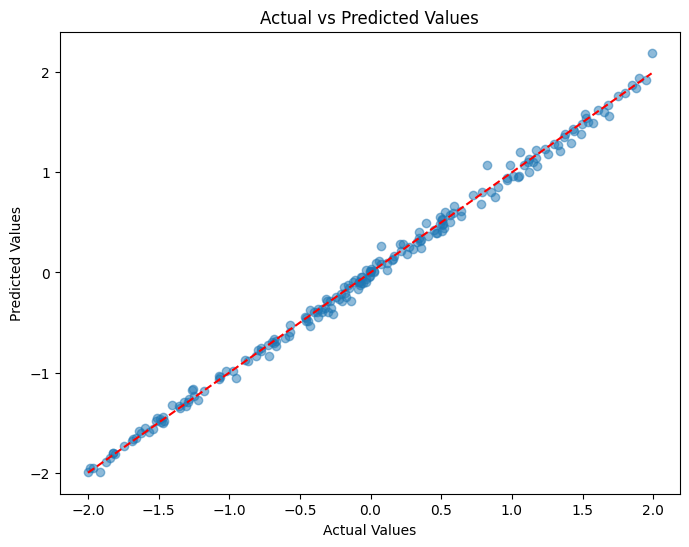

In [5]:
import matplotlib.pyplot as plt

# Plot predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test.numpy(), y_pred.numpy(), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

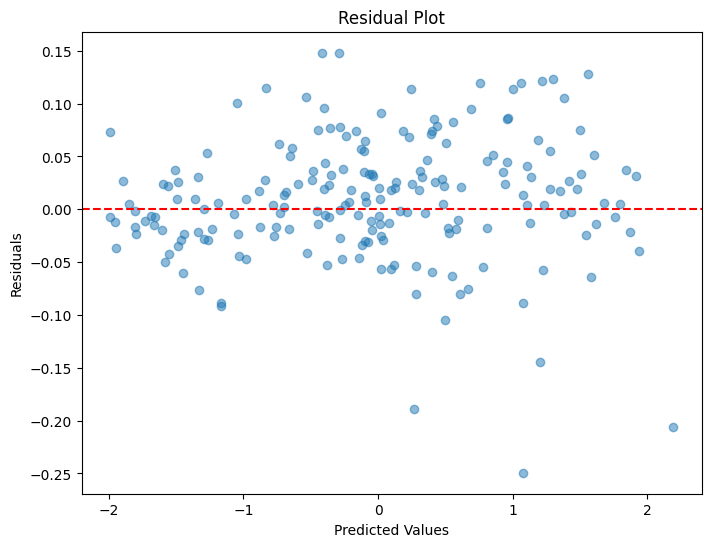

In [6]:
# Calculate residuals
residuals = y_test.numpy() - y_pred.numpy()

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred.numpy(), residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Horizontal line at 0
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [7]:
# Find the index of the maximum error
max_error_index = np.argmax(np.abs(residuals))

# Print the corresponding input, actual value, and predicted value
print(f"Input: {X_test[max_error_index].numpy()}")
print(f"Actual Value: {y_test[max_error_index].numpy()}")
print(f"Predicted Value: {y_pred[max_error_index].numpy()}")

Input: [0.5277011 0.9929648]
Actual Value: [0.8258494]
Predicted Value: [1.0751721]


Epoch [100/1000], Train Loss: 0.0031, Val Loss: 0.0029
Epoch [200/1000], Train Loss: 0.0031, Val Loss: 0.0029
Epoch [300/1000], Train Loss: 0.0030, Val Loss: 0.0029
Epoch [400/1000], Train Loss: 0.0030, Val Loss: 0.0029
Epoch [500/1000], Train Loss: 0.0030, Val Loss: 0.0030
Epoch [600/1000], Train Loss: 0.0030, Val Loss: 0.0030
Epoch [700/1000], Train Loss: 0.0030, Val Loss: 0.0033
Epoch [800/1000], Train Loss: 0.0034, Val Loss: 0.0036
Epoch [900/1000], Train Loss: 0.0031, Val Loss: 0.0030
Epoch [1000/1000], Train Loss: 0.0032, Val Loss: 0.0031


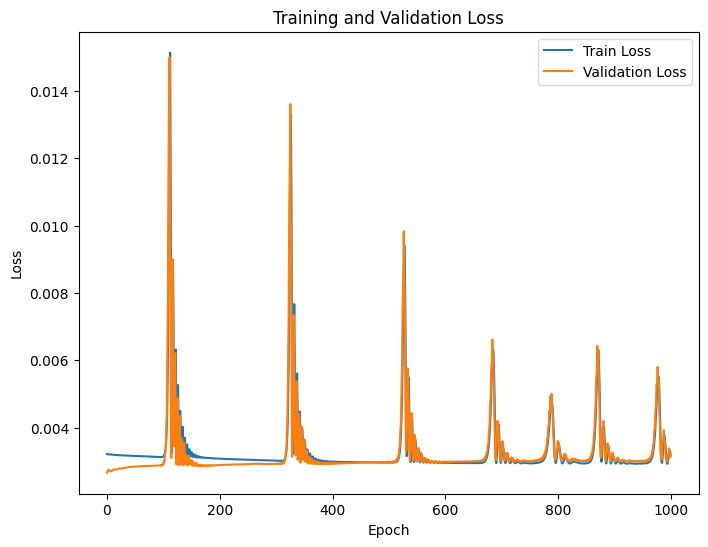

In [8]:
# Split training data into training and validation sets
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train the model with validation monitoring
train_losses, val_losses = [], []
for epoch in range(num_epochs):
    # Training
    model.train()
    outputs = model(X_train_new)
    loss = criterion(outputs, y_train_new)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Validation
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        val_loss = criterion(val_outputs, y_val)
        val_losses.append(val_loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

# Plot training and validation losses
plt.figure(figsize=(8, 6))
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import numpy as np

# Generate some synthetic data for demonstration
np.random.seed(42)
X = np.random.rand(1000, 2)  # 2 features
y = np.sin(2 * np.pi * X[:, 0]) + np.cos(2 * np.pi * X[:, 1])  # Target function

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define a KAN-inspired neural network
class KANRegressor(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(KANRegressor, self).__init__()
        # Univariate function approximators for each input feature
        self.univariate_functions = nn.ModuleList([
            nn.Sequential(
                nn.Linear(1, hidden_dim),
                nn.ReLU(),
                nn.Linear(hidden_dim, hidden_dim),
                nn.ReLU(),
                nn.Linear(hidden_dim, 1)
            ) for _ in range(input_dim)
        ])
        # Final combination layer
        self.combination_layer = nn.Linear(input_dim, 1)

    def forward(self, x):
        # Apply univariate functions to each feature
        univariate_outputs = [self.univariate_functions[i](x[:, i:i+1]) for i in range(x.size(1))]
        # Combine the outputs
        combined = torch.cat(univariate_outputs, dim=1)
        # Final output
        output = self.combination_layer(combined)
        return output

# Initialize the model
input_dim = X_train.shape[1]
hidden_dim = 10
model = KANRegressor(input_dim, hidden_dim)

# Define loss function and optimizer
criterion = nn.MSELoss()  # Using MSE as the loss function
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluate the model
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    # Calculate MAE
    mae = mean_absolute_error(y_test.numpy(), y_pred.numpy())
    print(f"Test MAE: {mae:.4f}")

Epoch [100/1000], Loss: 0.1507
Epoch [200/1000], Loss: 0.0860
Epoch [300/1000], Loss: 0.0061
Epoch [400/1000], Loss: 0.0037
Epoch [500/1000], Loss: 0.0034
Epoch [600/1000], Loss: 0.0035
Epoch [700/1000], Loss: 0.0031
Epoch [800/1000], Loss: 0.0031
Epoch [900/1000], Loss: 0.0029
Epoch [1000/1000], Loss: 0.0028
Test MAE: 0.0396
